In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from tqdm.auto import tqdm
from xgboost import XGBClassifier

from pyTrajectory.config import cfg
from pyTrajectory.io import load_dataset, save_dataset
from pyTrajectory.features import DataFrameFeatureExtractor
from pyTrajectory.dataset.classification.classify import classify_dataset
from pyTrajectory.dataset.classification.visualization import (
    plot_confusion_matrix,
    plot_classification_timeline,
)

from sklearn.impute import KNNImputer
from sklearn.utils.class_weight import compute_sample_weight
from scipy.signal import medfilt

cfg.key_keypoints = "keypoints"
cfg.key_timestamp = "timestamps"

cfg.trajectory_keys = (
    "keypoints",
    "timestamps",
)

In [2]:
%config InlineBackend.figure_format='retina'

In [3]:
annotations = pd.read_csv("datasets/mice_train_annotations.csv")

categories = tuple(np.unique(annotations["category"]))
categories

('attack', 'investigation', 'mount', 'none')

In [4]:
dataset_train = load_dataset("mice_train", directory="datasets", target="dyads", categories=categories)
dataset_test = load_dataset("mice_test", directory="datasets", target="dyads", categories=categories)

In [6]:
extractor = DataFrameFeatureExtractor(cache_directory="feature_cache_mice").read_yaml("config_file.yaml")

In [11]:
def subsample_train(dataset):
    global extractor
    X_subsample_even, y_subsample_even = dataset.subsample(
        extractor,
        0.1,
        pipeline=KNNImputer(),
        categories=("none", "investigation"),
        n_jobs=-1,
    )
    X_subsample_all, y_subsample_all = dataset.subsample(
        extractor,
        1.0,
        try_even_subsampling=False,
        pipeline=KNNImputer(),
        categories=("attack", "mount"),
        n_jobs=-1,
    )
    return (
        pd.concat([X_subsample_even, X_subsample_all]),
        np.concatenate([y_subsample_even, y_subsample_all]),
    )


k_fold_results = []

for _ in tqdm(range(10)):
    for fold_train, fold_holdout in dataset_train.k_fold(5, exclude=[("intruder", "resident")]):
        X_train, y_train = subsample_train(fold_train)

        xgbc = XGBClassifier().fit(
            X_train.to_numpy(),
            dataset_train.encode(y_train),
            sample_weight=compute_sample_weight("balanced", dataset_train.encode(y_train)),
        )

        k_fold_results.append(
            classify_dataset(
                xgbc,
                fold_holdout,
                extractor,
                pipeline=KNNImputer(),
            )
        )

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/56 [00:00<?, ?it/s]

  0%|          | 0/56 [00:00<?, ?it/s]

  0%|          | 0/56 [00:00<?, ?it/s]

  0%|          | 0/56 [00:00<?, ?it/s]

  0%|          | 0/56 [00:00<?, ?it/s]

  0%|          | 0/56 [00:00<?, ?it/s]

  0%|          | 0/56 [00:00<?, ?it/s]

  0%|          | 0/56 [00:00<?, ?it/s]

  0%|          | 0/56 [00:00<?, ?it/s]

  0%|          | 0/56 [00:00<?, ?it/s]

  0%|          | 0/56 [00:00<?, ?it/s]

  0%|          | 0/56 [00:00<?, ?it/s]

  0%|          | 0/56 [00:00<?, ?it/s]

  0%|          | 0/56 [00:00<?, ?it/s]

  0%|          | 0/56 [00:00<?, ?it/s]

  0%|          | 0/56 [00:00<?, ?it/s]

  0%|          | 0/56 [00:00<?, ?it/s]

  0%|          | 0/56 [00:00<?, ?it/s]

  0%|          | 0/56 [00:00<?, ?it/s]

  0%|          | 0/56 [00:00<?, ?it/s]

  0%|          | 0/56 [00:00<?, ?it/s]

  0%|          | 0/56 [00:00<?, ?it/s]

  0%|          | 0/56 [00:00<?, ?it/s]

  0%|          | 0/56 [00:00<?, ?it/s]

  0%|          | 0/56 [00:00<?, ?it/s]

  0%|          | 0/56 [00:00<?, ?it/s]

  0%|          | 0/56 [00:00<?, ?it/s]

  0%|          | 0/56 [00:00<?, ?it/s]

  0%|          | 0/56 [00:00<?, ?it/s]

  0%|          | 0/56 [00:00<?, ?it/s]

  0%|          | 0/56 [00:00<?, ?it/s]

  0%|          | 0/56 [00:00<?, ?it/s]

  0%|          | 0/56 [00:00<?, ?it/s]

  0%|          | 0/56 [00:00<?, ?it/s]

  0%|          | 0/56 [00:00<?, ?it/s]

  0%|          | 0/56 [00:00<?, ?it/s]

  0%|          | 0/56 [00:00<?, ?it/s]

  0%|          | 0/56 [00:00<?, ?it/s]

  0%|          | 0/56 [00:00<?, ?it/s]

  0%|          | 0/56 [00:00<?, ?it/s]

  0%|          | 0/56 [00:00<?, ?it/s]

  0%|          | 0/56 [00:00<?, ?it/s]

  0%|          | 0/56 [00:00<?, ?it/s]

  0%|          | 0/56 [00:00<?, ?it/s]

  0%|          | 0/56 [00:00<?, ?it/s]

  0%|          | 0/56 [00:00<?, ?it/s]

  0%|          | 0/56 [00:00<?, ?it/s]

  0%|          | 0/56 [00:00<?, ?it/s]

  0%|          | 0/56 [00:00<?, ?it/s]

  0%|          | 0/56 [00:00<?, ?it/s]

  0%|          | 0/56 [00:00<?, ?it/s]

  0%|          | 0/56 [00:00<?, ?it/s]

  0%|          | 0/56 [00:00<?, ?it/s]

  0%|          | 0/56 [00:00<?, ?it/s]

  0%|          | 0/56 [00:00<?, ?it/s]

  0%|          | 0/56 [00:00<?, ?it/s]

  0%|          | 0/56 [00:00<?, ?it/s]

  0%|          | 0/56 [00:00<?, ?it/s]

  0%|          | 0/56 [00:00<?, ?it/s]

  0%|          | 0/56 [00:00<?, ?it/s]

  0%|          | 0/56 [00:00<?, ?it/s]

  0%|          | 0/56 [00:00<?, ?it/s]

  0%|          | 0/56 [00:00<?, ?it/s]

  0%|          | 0/56 [00:00<?, ?it/s]

  0%|          | 0/56 [00:00<?, ?it/s]

  0%|          | 0/56 [00:00<?, ?it/s]

  0%|          | 0/56 [00:00<?, ?it/s]

  0%|          | 0/56 [00:00<?, ?it/s]

  0%|          | 0/56 [00:00<?, ?it/s]

  0%|          | 0/56 [00:00<?, ?it/s]

  0%|          | 0/56 [00:00<?, ?it/s]

  0%|          | 0/56 [00:00<?, ?it/s]

  0%|          | 0/56 [00:00<?, ?it/s]

  0%|          | 0/56 [00:00<?, ?it/s]

  0%|          | 0/56 [00:00<?, ?it/s]

  0%|          | 0/56 [00:00<?, ?it/s]

  0%|          | 0/56 [00:00<?, ?it/s]

  0%|          | 0/56 [00:00<?, ?it/s]

  0%|          | 0/56 [00:00<?, ?it/s]

  0%|          | 0/56 [00:00<?, ?it/s]

  0%|          | 0/56 [00:00<?, ?it/s]

  0%|          | 0/56 [00:00<?, ?it/s]

  0%|          | 0/56 [00:00<?, ?it/s]

  0%|          | 0/56 [00:00<?, ?it/s]

  0%|          | 0/56 [00:00<?, ?it/s]

  0%|          | 0/56 [00:00<?, ?it/s]

  0%|          | 0/56 [00:00<?, ?it/s]

  0%|          | 0/56 [00:00<?, ?it/s]

  0%|          | 0/56 [00:00<?, ?it/s]

  0%|          | 0/56 [00:00<?, ?it/s]

  0%|          | 0/56 [00:00<?, ?it/s]

  0%|          | 0/56 [00:00<?, ?it/s]

  0%|          | 0/56 [00:00<?, ?it/s]

  0%|          | 0/56 [00:00<?, ?it/s]

  0%|          | 0/56 [00:00<?, ?it/s]

  0%|          | 0/56 [00:00<?, ?it/s]

  0%|          | 0/56 [00:00<?, ?it/s]

  0%|          | 0/56 [00:00<?, ?it/s]

  0%|          | 0/56 [00:00<?, ?it/s]

  0%|          | 0/56 [00:00<?, ?it/s]

In [12]:
scores = []

for k_fold_result in k_fold_results:
    scores.append([])
    for median_filter_window in tqdm(np.arange(3, 91, 2)):
        k_fold_result.smooth([lambda arr: medfilt(arr, median_filter_window)])
        scores[-1].append(k_fold_result.score(dataset_train.encode))

  0%|          | 0/44 [00:00<?, ?it/s]

  0%|          | 0/44 [00:00<?, ?it/s]

  0%|          | 0/44 [00:00<?, ?it/s]

  0%|          | 0/44 [00:00<?, ?it/s]

  0%|          | 0/44 [00:00<?, ?it/s]

  0%|          | 0/44 [00:00<?, ?it/s]

  0%|          | 0/44 [00:00<?, ?it/s]

  0%|          | 0/44 [00:00<?, ?it/s]

  0%|          | 0/44 [00:00<?, ?it/s]

  0%|          | 0/44 [00:00<?, ?it/s]

  0%|          | 0/44 [00:00<?, ?it/s]

  0%|          | 0/44 [00:00<?, ?it/s]

  0%|          | 0/44 [00:00<?, ?it/s]

  0%|          | 0/44 [00:00<?, ?it/s]

  0%|          | 0/44 [00:00<?, ?it/s]

KeyboardInterrupt: 

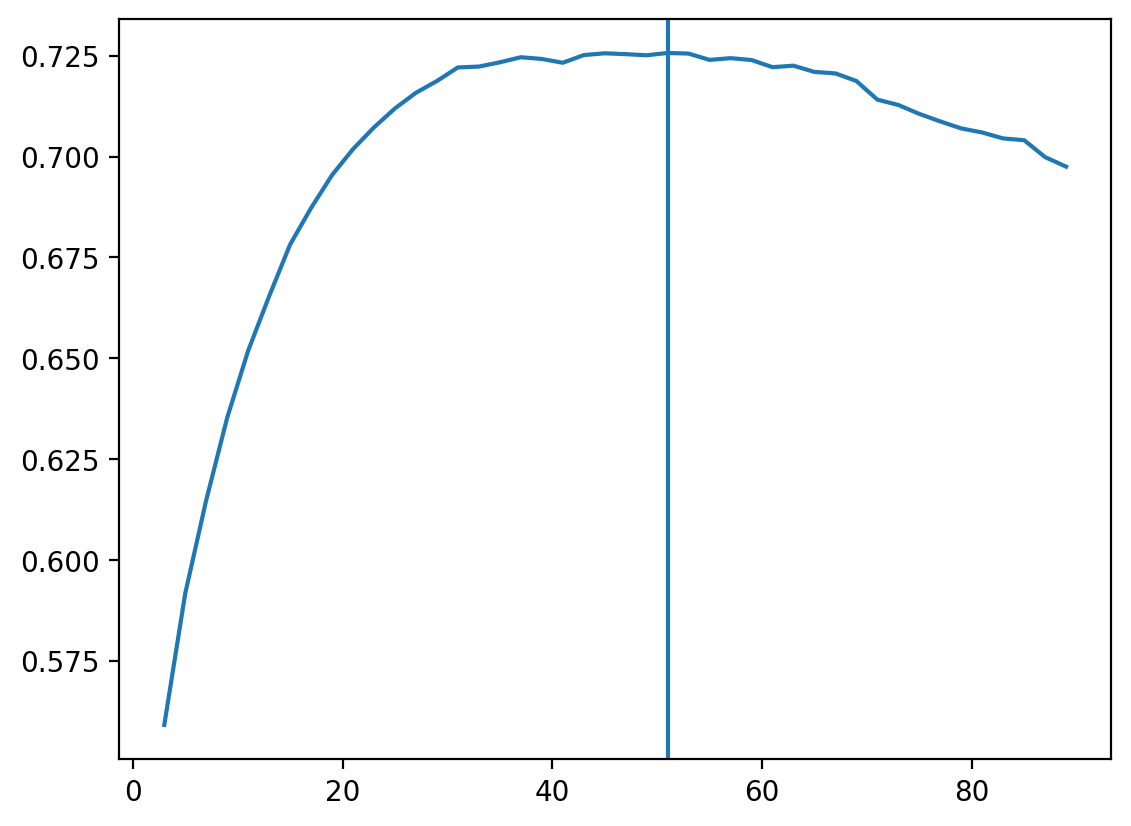

51


In [17]:
avg_score = np.mean(scores[:-1], axis=(0, -2, -1))

plt.plot(np.arange(3, 91, 2), avg_score)
plt.axvline(np.arange(3, 91, 2)[np.argmax(avg_score)])
plt.show()

print(np.arange(3, 91, 2)[np.argmax(avg_score)])

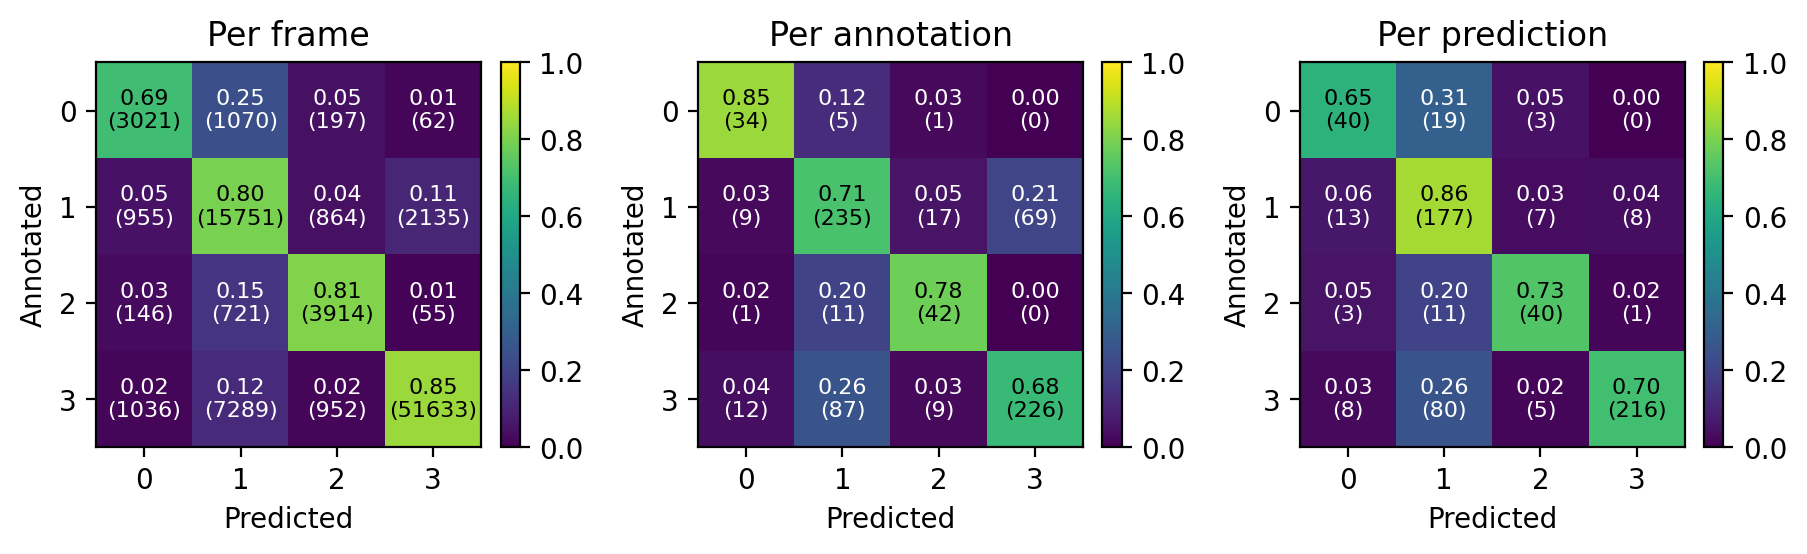

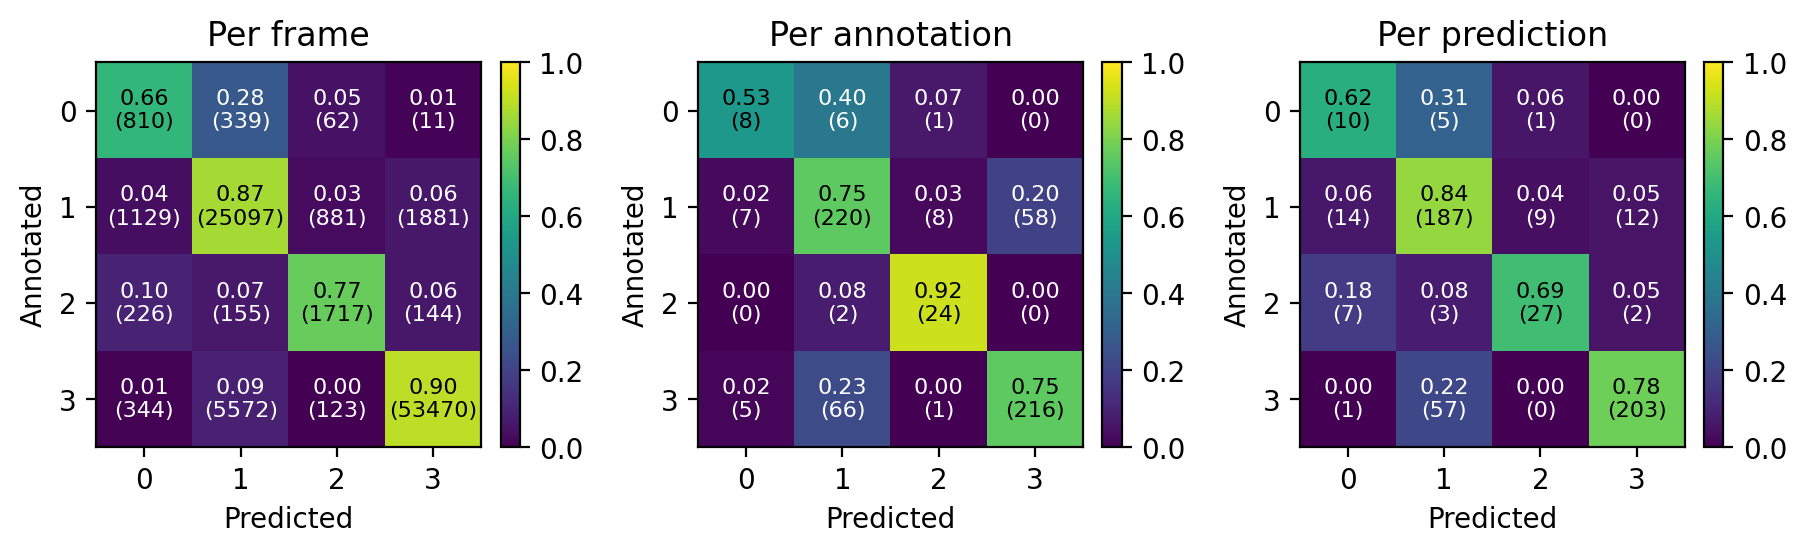

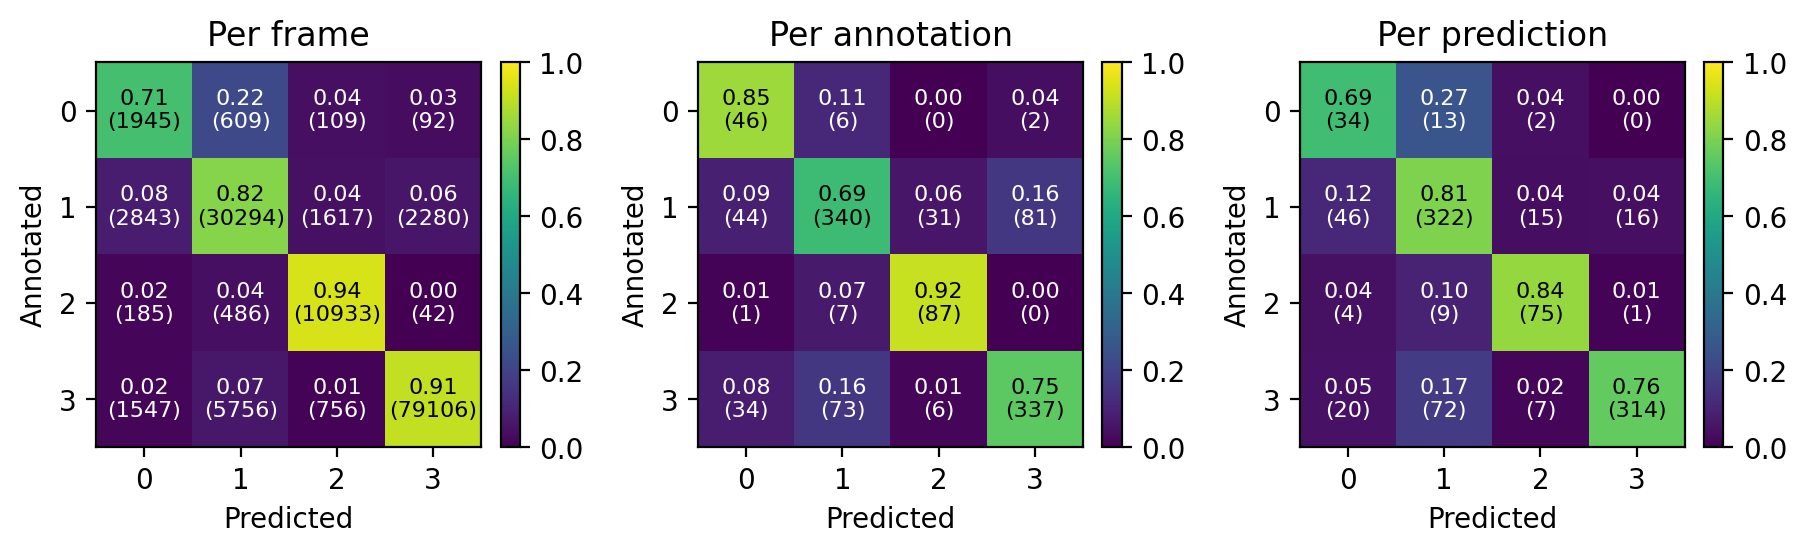

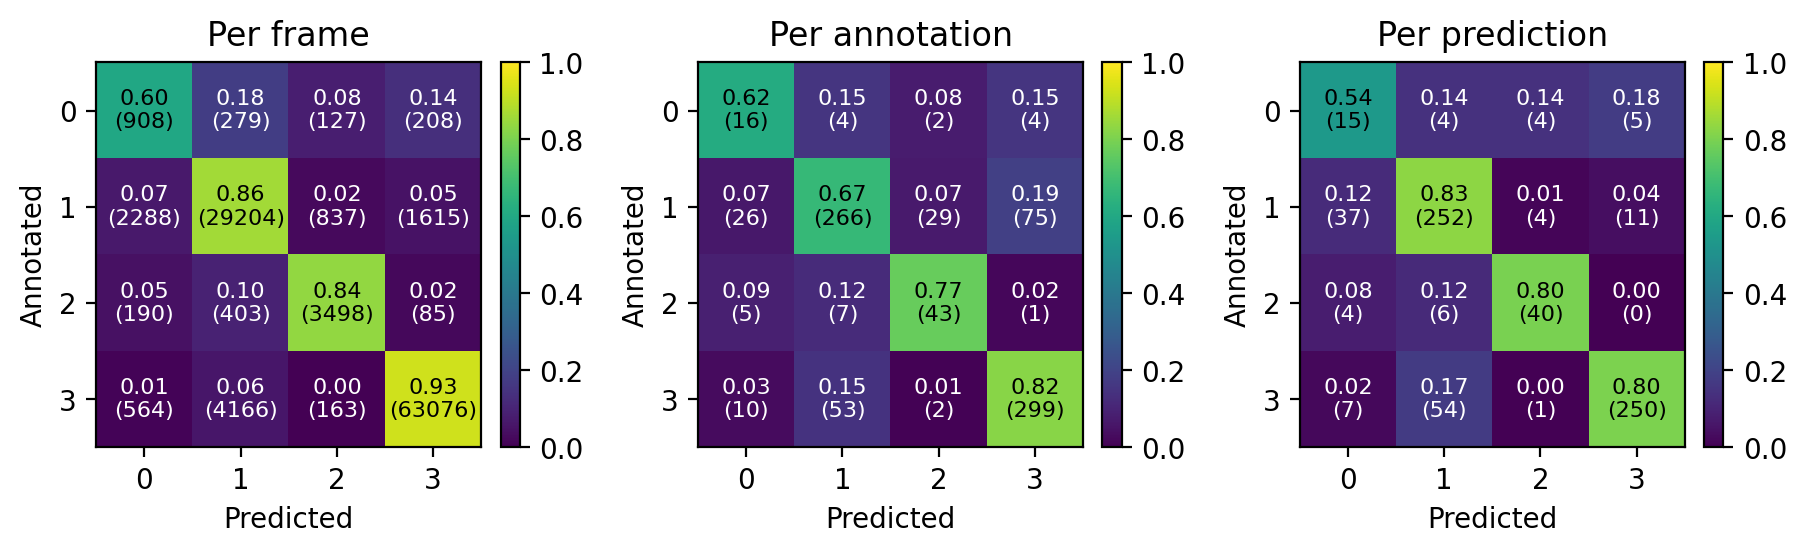

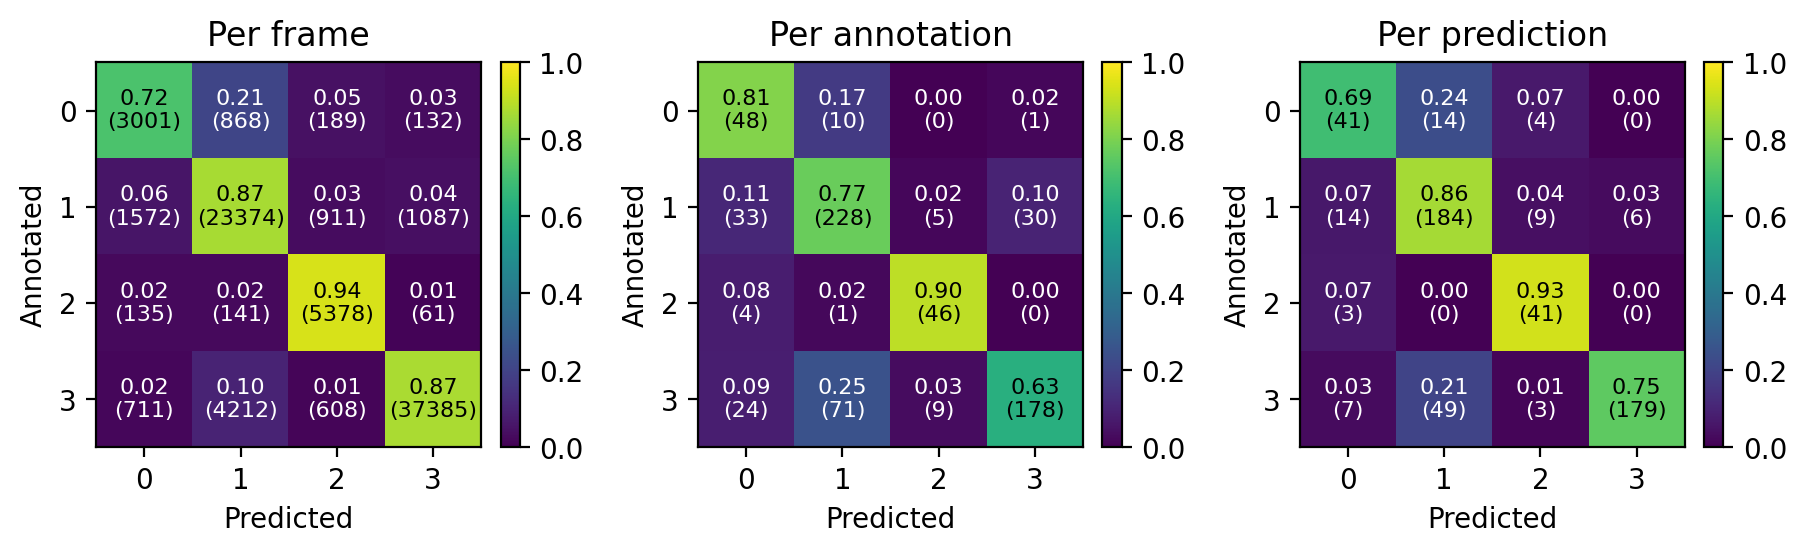

In [10]:
for k_fold_result in k_fold_results:

    k_fold_result.smooth([lambda arr: medfilt(arr, 43)])

    fig, axes = plt.subplots(1, 3, figsize=(11, 2.5))

    plot_confusion_matrix(
        k_fold_result.y_true_numeric,
        k_fold_result.y_pred_numeric,
        ax=axes[0],
    )

    plot_confusion_matrix(
        dataset_train.encode(k_fold_result.annotations["category"].to_numpy()),
        dataset_train.encode(k_fold_result.annotations["predicted_category"].to_numpy()),
        ax=axes[1],
    )

    plot_confusion_matrix(
        dataset_train.encode(k_fold_result.predictions["true_category"].to_numpy()),
        dataset_train.encode(k_fold_result.predictions["category"].to_numpy()),
        ax=axes[2],
    )

    axes[0].set_title("Per frame")
    axes[1].set_title("Per annotation")
    axes[2].set_title("Per prediction")

    plt.show()

In [ ]:
# 16 seems systematically shifted, maybe 41,

In [ ]:
classification_results = k_fold_result.classification_results[41].classification_results[('resident', 'intruder')]

plot_classification_timeline(
    classification_results.predictions,
    classification_results.categories,
    annotations=classification_results.annotations,
    interval=(-np.inf, np.inf),
    y_proba=classification_results.y_proba,
    y_proba_smoothed=classification_results.y_proba_smoothed,
    x_tick_step=(60 * 30),
    # x_tick_conversion=lambda ticks: [int(tick / (30 * 60)) for tick in ticks],
)

In [ ]:
from sklearn.metrics import f1_score

f1_score(
    dataset_train.encode(dataset_classification_result.predictions["true_category"].to_numpy()),
    dataset_train.encode(dataset_classification_result.predictions["category"].to_numpy()),
    labels=range(len(dataset_train.categories)),
    average=None,
)

In [ ]:
from sklearn.metrics import f1_score

f1_score(
    dataset_train.encode(dataset_classification_result.predictions["true_category"].to_numpy()),
    dataset_train.encode(dataset_classification_result.predictions["category"].to_numpy()),
    labels=range(len(dataset_train.categories)),
    average=None,
)

In [ ]:
from sklearn.metrics import f1_score

f1_score(
    dataset_train.encode(dataset_classification_result.predictions["true_category"].to_numpy()),
    dataset_train.encode(dataset_classification_result.predictions["category"].to_numpy()),
    labels=range(len(dataset_train.categories)),
    average=None,
)

In [ ]:
from classification_utils import validate_predictions, interval_f1_score

import matplotlib.pyplot as plt

plt.boxplot(
    [
        f1_scores[np.isfinite(f1_scores)]
        for f1_scores in
        interval_f1_score(
            dataset_classification_result.predictions,
            dataset_classification_result.annotations,
            encode_func=dataset_train.encode,
            num_categories=len(dataset_train.categories),
        ).T
    ]
)
plt.show()

In [ ]:
from sklearn.metrics import f1_score

In [ ]:
y_test_numeric = dataset_train.encode(y_test)
y_pred = xgbc.predict(X_test)

plot_confusion_matrix(y_test_numeric, y_pred, category_labels=["att", "inv", "mnt", "none"])

In [ ]:
f1_score(y_test_numeric, y_pred, average=None)

In [ ]:
dataset_predictions_test = to_prediction_dataset(classification_result_dataset_test, target="dyads")

In [ ]:
save_dataset(dataset_predictions_test, directory="datasets", dataset_name="mice_predictions", annotation_type="predictions")

In [ ]:
from pyTrajectory.io import load_dataset

dataset_predictions = load_dataset(directory="datasets", target="dyads", categories=('attack', 'investigation', 'mount', 'none'), dataset_name="mice_predictions", annotation_type="predictions")

In [ ]:
from observation_library import ObservationLibrary
from glob import glob
import json

annotations = dataset_predictions.get_annotations(exclude=[("intruder", "resident")])

video_files = sorted(glob("/home/paul/Downloads/task1_videos_mp4/test/*.mp4"))
video_lookup = {idx: [video_file] for idx, video_file in enumerate(video_files)}
trajectory_lookup = {
    group: dataset_predictions.select(group).trajectories
    for group in (
        dataset_predictions.groups
        if isinstance(dataset_predictions.groups, dict)
        else range(len(dataset_predictions.groups))
    )
}

observation_library = ObservationLibrary(
    annotations,
    video_lookup=video_lookup,
    trajectory_lookup=trajectory_lookup,
    num_keypoints=7,
    filter_dependencies={
        "actor": ("group", ),
        "recipient": ("group", "actor"),
    },
    highlight_observations_mode="category",
    selected_observations_mode="dyad",
)

with open("render_settings.json", "r") as f:
    render_settings = json.load(f)
    for key in render_settings:
        setattr(observation_library.render_settings, key, render_settings[key])

observation_library